In [1]:

import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.reset_orig()
sc.settings._vector_friendly = True

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["savefig.transparent"] = True
plt.rcParams["figure.figsize"] = (4, 4)

plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.titleweight"] = 500
plt.rcParams["axes.titlepad"] = 8.0
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = 500
plt.rcParams["axes.linewidth"] = 1.2
plt.rcParams["axes.labelpad"] = 6.0
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False


plt.rcParams["font.size"] = 11
plt.rcParams['font.sans-serif'] = ['Helvetica', "Computer Modern Sans Serif", "DejaVU Sans"]
plt.rcParams['font.weight'] = 500

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['xtick.minor.size'] = 1.375
plt.rcParams['xtick.major.size'] = 2.75
plt.rcParams['xtick.major.pad'] = 2
plt.rcParams['xtick.minor.pad'] = 2

plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['ytick.minor.size'] = 1.375
plt.rcParams['ytick.major.size'] = 2.75
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.minor.pad'] = 2

plt.rcParams["legend.fontsize"] = 12
plt.rcParams['legend.handlelength'] = 1.4
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 3
plt.rcParams['legend.frameon'] = False

plt.rcParams['lines.linewidth'] = 1.7

DPI = 300

# UMAPS

In [15]:



adata = anndata.read('../data/round1round2_processed.h5ad')
adata = adata[adata.obs['round']=='round_1'].copy()
adata.write('round1_processed.h5ad')


In [16]:
adata = anndata.read('round1_processed.h5ad')

In [17]:
adata

AnnData object with n_obs × n_vars = 27847 × 36611
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [18]:
adata.obs['gmm_infection_annotated'] = adata.obs['gmm_infection'].replace({'0':'No Infection', 
                                                                           '1': 'Low Infection',
                                                                           '2':'High Infection'})
adata.obs['condition_manual_ct_annotation'] = adata.obs['condition'].astype(str) + '_' + adata.obs['manual_ct_annotation'].astype(str)

# adata.write('round1_processed.h5ad')

In [19]:
adata.obs['infection_gmm']

AAACCCAGTCCGCAGT-1    I_0
AAACCCATCAGGTAAA-1    I_0
AAACCCATCCTGTTAT-1    I_0
AAACCCATCTAGTTCT-1    I_0
AAACGAACATTCCTCG-1    I_0
                     ... 
TTTGTTGGTTTGAAAG-1    I_0
TTTGTTGTCATAGGCT-1    I_0
TTTGTTGTCGTACCTC-1    I_0
TTTGTTGTCGTAGTCA-1    I_0
TTTGTTGTCTGTACAG-1    I_0
Name: infection_gmm, Length: 27847, dtype: category
Categories (4, object): ['I_0', 'I_1', 'I_2', 'U_0']

In [20]:
label, count = np.unique(adata.obs['manual_ct_annotation'], return_counts=True)
add_count_dict = {a:f'{a} \n(n={b})' for a,b in zip(label,count)}

adata.obs['manual_ct_annotation_plus_n']  = adata.obs['manual_ct_annotation'].replace(add_count_dict)


In [21]:

sc.set_figure_params(scanpy=True, 
                     dpi=300,
                     dpi_save=300,
                     frameon=True,
                     vector_friendly=True,
                     fontsize=14,
                     figsize=None,
                     color_map=None,
                     format='png',
                     facecolor=None,
                     transparent=False,
                     ipython_format='png2x')


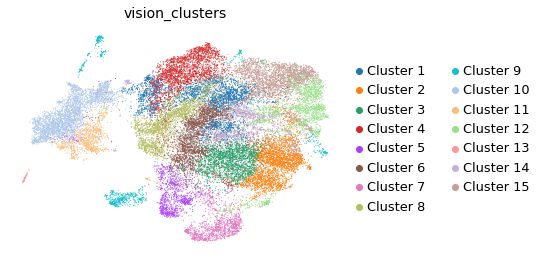

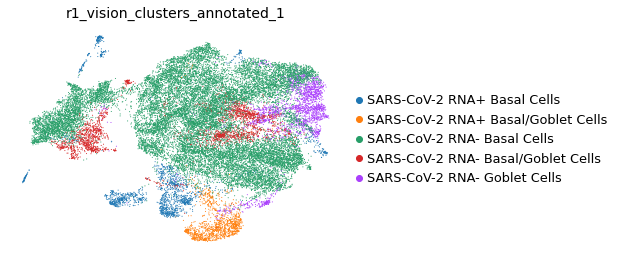

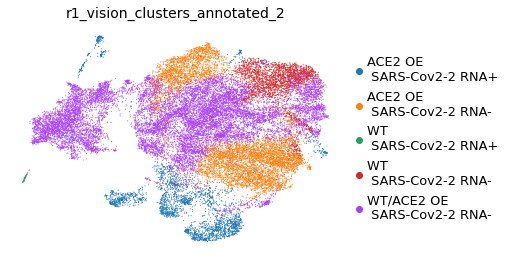

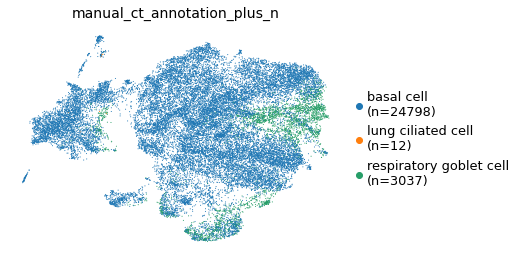

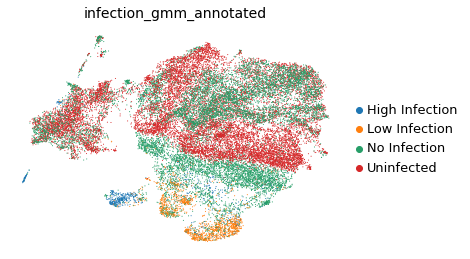

In [23]:
# Vision clusters
ax = sc.pl.umap(adata, 
           color = ['vision_clusters'],
           ncols = 1, 
           frameon=False,
           return_fig=True
          )
ax.savefig('8_round1_figs/round1_vision_clusters.pdf', bbox_inches='tight')

# Annotation 1 of Vision clusters
ax = sc.pl.umap(adata, 
           color = ['r1_vision_clusters_annotated_1'],
           ncols = 1, 
           frameon=False, 
                return_fig=True
          )
ax.savefig('8_round1_figs/round1_vision_clusters_annotated_1.pdf', bbox_inches='tight')

# Annotation 2 of Vision clusters
ax = sc.pl.umap(adata, 
           color = ['r1_vision_clusters_annotated_2'],
           ncols = 1, 
           frameon=False,
                return_fig=True
          )
ax.savefig('8_round1_figs/round1_vision_clusters_annotated_2.pdf', bbox_inches='tight')

# Celltypes
ax = sc.pl.umap(adata, 
           color = ['manual_ct_annotation_plus_n'],
           ncols = 1, 
           frameon=False,
                return_fig=True
          )
ax.savefig('8_round1_figs/round1_manual_ct_annotation_plus_n.pdf', bbox_inches='tight')

# GMM classified infection
ax = sc.pl.umap(adata, 
           color = ['infection_gmm_annotated'],
           ncols = 1, 
           frameon=False,
                return_fig=True
          )
ax.savefig('8_round1_figs/round1_infection_gmm_annotated.pdf', bbox_inches='tight')



In [24]:
sns.color_palette("muted")


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [25]:
batch_color = ["#2264e0", "#eb9010"]

In [26]:
import matplotlib.colors as colors
import matplotlib.cm as cm

In [27]:

cm_20c = np.array(list(map(colors.to_hex, cm.tab20c.colors)))



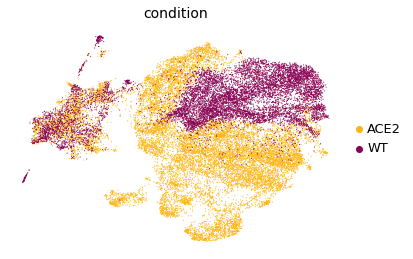

In [28]:

ax = sc.pl.umap(adata, 
                color = ['condition'],
                ncols = 1, 
                frameon=False,
                return_fig=True,
                palette=["#FDB515", "#870052"]
               )

ax.savefig('8_round1_figs/round1_vision_clusters_condition.pdf', bbox_inches='tight')



In [29]:
adata.obs['ace2_infection'] = adata.obs['condition'].astype(str) + '_' + adata.obs['infection'].astype(str)

... storing 'ace2_infection' as categorical


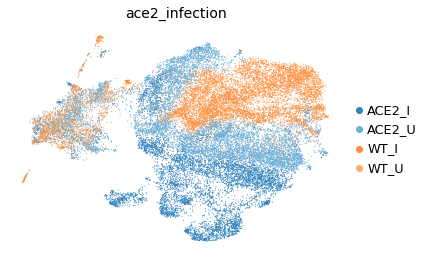

In [30]:
ax = sc.pl.umap(adata, 
                color = ['ace2_infection'],
                ncols = 1, 
               frameon=False,
               palette = list(cm_20c[[0,1,5,6]]),
               return_fig=True
              )

ax.savefig('8_round1_figs/round1_vision_clusters_ace2_infection.pdf', bbox_inches='tight')


In [31]:
sns.color_palette("hls", 10)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

In [32]:
sns.color_palette("hls", 11)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6548363636363637, 0.33999999999999997),
 (0.7815272727272726, 0.86, 0.33999999999999997),
 (0.4978909090909092, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.46574545454545463),
 (0.33999999999999997, 0.86, 0.7493818181818184),
 (0.33999999999999997, 0.6869818181818181, 0.86),
 (0.33999999999999997, 0.4033454545454544, 0.86),
 (0.560290909090909, 0.33999999999999997, 0.86),
 (0.8439272727272731, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.592436363636363)]

In [33]:
sns.color_palette("hls", 9)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7178666666666667, 0.33999999999999997),
 (0.6554666666666664, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.7178666666666667),
 (0.33999999999999997, 0.6554666666666664, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.7178666666666661, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6554666666666664)]

In [34]:
tmp_colors = np.array(list(map(colors.to_hex, sns.color_palette("hls", 9)[::-1][1::2])))

In [35]:
tmp_colors[1] = "#870052"

In [36]:
tmp_colors

array(['#b757db', '#870052', '#57db5f', '#dbb757'], dtype='<U7')

In [37]:
sns.color_palette("hls",9)[::-1][1::2]

[(0.7178666666666661, 0.33999999999999997, 0.86),
 (0.33999999999999997, 0.6554666666666664, 0.86),
 (0.33999999999999997, 0.86, 0.3712),
 (0.86, 0.7178666666666667, 0.33999999999999997)]

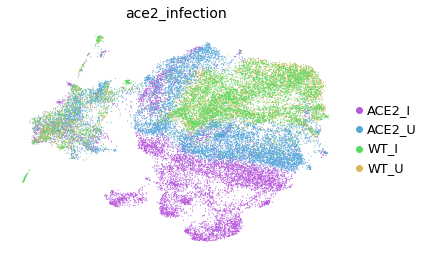

In [38]:
ax = sc.pl.umap(adata, 
           color = ['ace2_infection'],
           ncols = 1, 
           frameon=False,
                return_fig=True,
#            save='round1_vision_clusters_ace2_infection.pdf',
#            palette=list(tmp_colors)
           palette=sns.color_palette("hls",9)[::-1][1::2]
#            palette=list(map(colors.to_hex, cm.tab10.colors))           
           
#            palette=list(map(colors.to_hex, cm.tab20.colors))           
          )

ax.savefig('8_round1_figs/round1_vision_clusters_ace2_infection.pdf', bbox_inches='tight')


In [39]:
adata.obs['manual_ct_annotation'].value_counts()

basal cell                 24798
respiratory goblet cell     3037
lung ciliated cell            12
Name: manual_ct_annotation, dtype: int64

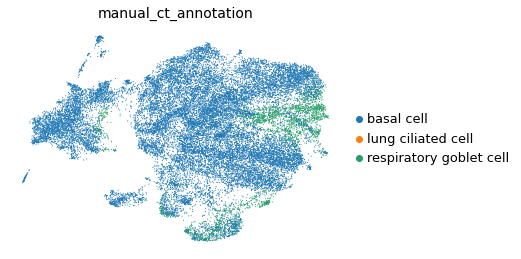

In [40]:
ax = sc.pl.umap(adata, 
           color = ['manual_ct_annotation'],
           ncols = 1, 
           frameon=False,
                return_fig=True
#            save='round1_vision_clusters_ace2_celltype_manual.pdf'
          )

ax.savefig('8_round1_figs/round1_vision_clusters_ace2_celltype_manual.pdf', bbox_inches='tight')



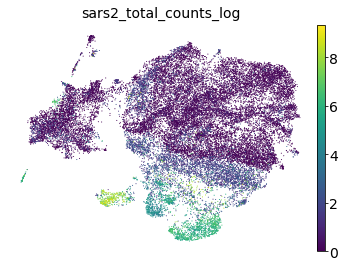

In [41]:

ax = sc.pl.umap(adata, 
           color = ['sars2_total_counts_log'],
           ncols = 1, 
           frameon=False,
                return_fig=True
#            save='round1_vision_clusters_ace2_sars2_totalcounts_log.pdf'
          )
ax.savefig('8_round1_figs/round1_vision_clusters_ace2_sars2_totalcounts_log.pdf', bbox_inches='tight')



In [42]:
adata.obs['gmm_infection_annotated'].value_counts()

No Infection      25640
Low Infection      1488
High Infection      719
Name: gmm_infection_annotated, dtype: int64

In [43]:
# adata.write('processed_data/scv2_round1.h5ad')


In [65]:
# adata = anndata.read('processed_data/scv2_round1.h5ad')

# adata.obs['condition_celltype_manual'] = adata.obs['condition'].astype(str) + '_' + adata.obs['cell_type_manual'].astype(str)

# adata.write('processed_data/scv2_round1.h5ad')


... storing 'condition_celltype_manual' as categorical


# bar plots

In [44]:



adata = anndata.read('round1_processed.h5ad')


In [45]:
adata

AnnData object with n_obs × n_vars = 27847 × 36611
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [46]:
adata = adata[adata.obs['infection']=='U'].copy()

In [47]:
adata = adata[adata.obs['manual_ct_annotation'] != 'lung ciliated cell']

In [48]:
adata

View of AnnData object with n_obs × n_vars = 14095 × 36611
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf

In [49]:
adata.obs['round']

AAACCCACAACTACGT-1    round_1
AAACCCACACCTGCAG-1    round_1
AAACCCACACTGCTTC-1    round_1
AAACCCACAGATTAAG-1    round_1
AAACCCACAGGAGGTT-1    round_1
                       ...   
TTTGGTTTCCGTGTAA-1    round_1
TTTGGTTTCTCGTCGT-1    round_1
TTTGGTTTCTGGAGAG-1    round_1
TTTGTTGCAAAGCAAT-1    round_1
TTTGTTGGTCACGACC-1    round_1
Name: round, Length: 14095, dtype: category
Categories (1, object): ['round_1']

In [50]:
df = adata.obs[['condition', 'manual_ct_annotation']].groupby(['condition', 'manual_ct_annotation']).size().unstack(1)




In [51]:
df

manual_ct_annotation,basal cell,respiratory goblet cell
condition,,
ACE2,8905,613
WT,3957,620


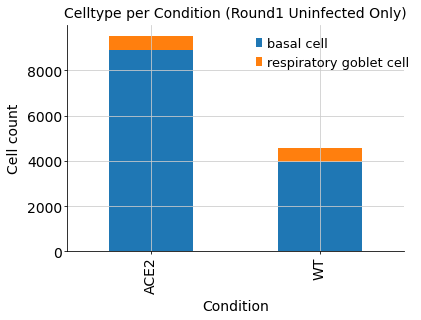

In [52]:
ax = df.plot.bar(stacked=True)
ax.set_xlabel('Condition')
ax.set_ylabel('Cell count')
ax.set_title('Celltype per Condition (Round1 Uninfected Only)')

ax.legend(bbox_to_anchor=(1.05, 1))



In [53]:
df.index = [f'{a}\n(n={b})' for a,b in zip(df.index,np.sum(df, axis=1).values)]

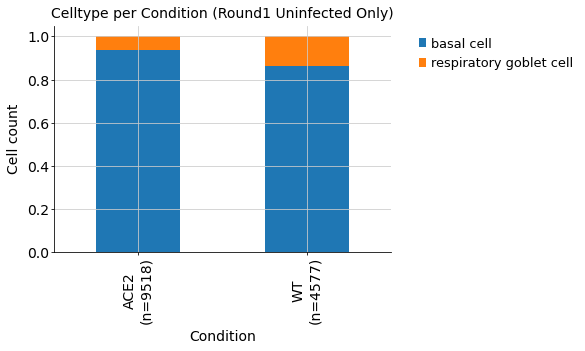

In [54]:
df = df.divide(np.sum(df, axis=1), axis=0)


ax.set_title('Percent Celltype per Condition (Round1 Uninfected Only)')

ax = df.plot.bar(stacked=True)
ax.set_xlabel('Condition')
ax.set_ylabel('Cell count')
ax.set_title('Celltype per Condition (Round1 Uninfected Only)')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.get_figure().savefig('8_round1_figs/suppl1A_round1_celltypes_per_condition_pct.pdf', bbox_inches='tight')

## Infection per condition

In [77]:

adata = anndata.read('round1_processed.h5ad')

adata = adata[adata.obs['manual_ct_annotation'] != 'lung ciliated cell']

In [78]:
adata

View of AnnData object with n_obs × n_vars = 27835 × 36611
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf

In [79]:
infected = adata[adata.obs['infection']=='I'].copy()

In [80]:
infected

AnnData object with n_obs × n_vars = 13740 × 36611
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [81]:

df = infected.obs[['condition', 'infection_gmm_annotated']].groupby(['condition', 'infection_gmm_annotated']).size().unstack(1)



In [82]:

df

infection_gmm_annotated,High Infection,Low Infection,No Infection
condition,,,
ACE2,644,1486,5833
WT,75,2,5700


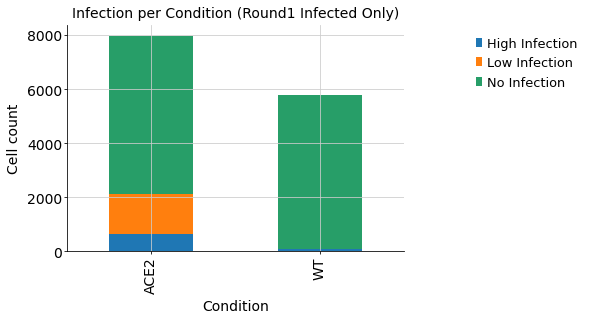

In [83]:
ax = df.plot.bar(stacked=True)
ax.set_xlabel('Condition')
ax.set_ylabel('Cell count')
ax.set_title('Infection per Condition (Round1 Infected Only)')

ax.legend(bbox_to_anchor=(1.55, 1))

# ax.legend(loc='best')

ax.get_figure().savefig('8_round1_figs/round1_infection_per_condition.pdf', bbox_inches='tight')

## infection per condition per celltype

In [89]:



adata = anndata.read('round1_processed.h5ad')
adata = adata[adata.obs['manual_ct_annotation'] != 'lung ciliated cell']

adata.obs['condition_manual_ct_annotation'] = adata.obs['condition'].astype(str) + adata.obs['manual_ct_annotation'].astype(str)



Trying to set attribute `.obs` of view, copying.


In [90]:
infected=adata

In [91]:
infected = adata[adata.obs['infection']=='I'].copy()

In [92]:

df = infected.obs[['condition_manual_ct_annotation', 'infection_gmm_annotated']].groupby(['condition_manual_ct_annotation', 'infection_gmm_annotated']).size().unstack(1)



In [93]:
df

infection_gmm_annotated,High Infection,Low Infection,No Infection
condition_manual_ct_annotation,,,
ACE2basal cell,573,1044,5340
ACE2respiratory goblet cell,71,442,493
WTbasal cell,73,2,4904
WTrespiratory goblet cell,2,0,796


In [94]:
table = df/df.sum(axis=1)[:, None]*100

<ipython-input-94-7a9b330bff9a>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  table = df/df.sum(axis=1)[:, None]*100


In [95]:
table

infection_gmm_annotated,High Infection,Low Infection,No Infection
condition_manual_ct_annotation,,,
ACE2basal cell,8.236309,15.006468,76.757223
ACE2respiratory goblet cell,7.057654,43.936382,49.005964
WTbasal cell,1.466158,0.040169,98.493673
WTrespiratory goblet cell,0.250627,0.000000,99.749373


In [96]:
table = table.round(decimals=2)

In [97]:
table

infection_gmm_annotated,High Infection,Low Infection,No Infection
condition_manual_ct_annotation,,,
ACE2basal cell,8.24,15.01,76.76
ACE2respiratory goblet cell,7.06,43.94,49.01
WTbasal cell,1.47,0.04,98.49
WTrespiratory goblet cell,0.25,0.00,99.75


In [98]:
pct_infection_table = table.astype(str) + '% (n='+df.astype(str)+')'

In [99]:
# SUPP1 D
pct_infection_table

infection_gmm_annotated,High Infection,Low Infection,No Infection
condition_manual_ct_annotation,,,
ACE2basal cell,8.24% (n=573),15.01% (n=1044),76.76% (n=5340)
ACE2respiratory goblet cell,7.06% (n=71),43.94% (n=442),49.01% (n=493)
WTbasal cell,1.47% (n=73),0.04% (n=2),98.49% (n=4904)
WTrespiratory goblet cell,0.25% (n=2),0.0% (n=0),99.75% (n=796)


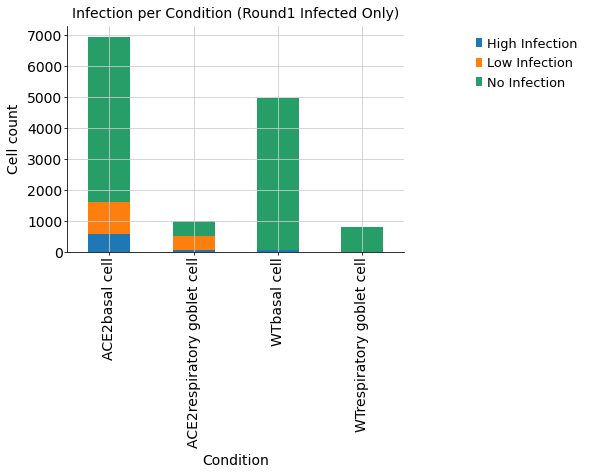

In [100]:
ax = df.plot.bar(stacked=True)
ax.set_xlabel('Condition')
ax.set_ylabel('Cell count')
ax.set_title('Infection per Condition (Round1 Infected Only)')

ax.legend(bbox_to_anchor=(1.55, 1))

ax.get_figure().savefig('8_round1_figs/round1_infection_per_condition_per_ct.pdf', bbox_inches='tight')

In [101]:
df.index = [f'{a}\n(n={b})' for a,b in zip(df.index,np.sum(df, axis=1).values)]

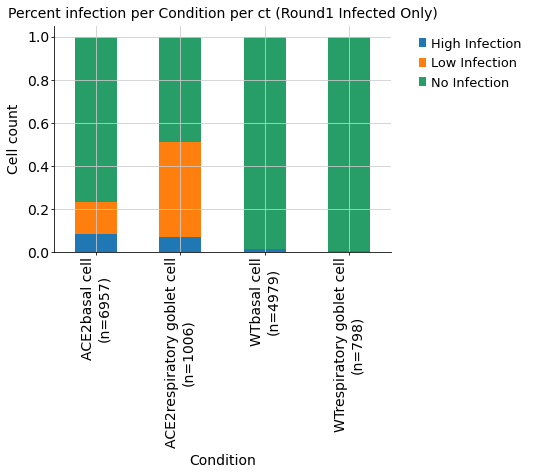

In [102]:
df = df.divide(np.sum(df, axis=1), axis=0)

ax = df.plot.bar(stacked=True)
ax.set_xlabel('Condition')
ax.set_ylabel('Cell count')
ax.set_title('Percent infection per Condition per ct (Round1 Infected Only)')

ax.legend(bbox_to_anchor=(1.05, 1))
ax.get_figure().savefig('8_round1_figs/suppl1C_round1_celltypes_per_condition_per_ct_pct.pdf', bbox_inches='tight')

# Infection per celltype 

In [106]:

adata = anndata.read('round1_processed.h5ad')
adata = adata[adata.obs['manual_ct_annotation'] != 'lung ciliated cell']
adata = adata[adata.obs['condition']=='ACE2']
adata.obs['condition_manual_ct_annotation'] = adata.obs['condition'].astype(str) + adata.obs['manual_ct_annotation'].astype(str)


Trying to set attribute `.obs` of view, copying.


In [107]:
adata.obs['condition']

AAACCCAGTCCGCAGT-1    ACE2
AAACCCATCAGGTAAA-1    ACE2
AAACCCATCCTGTTAT-1    ACE2
AAACCCATCTAGTTCT-1    ACE2
AAACGAACATTCCTCG-1    ACE2
                      ... 
TTTGTTGGTTTGACAC-1    ACE2
TTTGTTGTCCGAGAAG-1    ACE2
TTTGTTGTCGGTGTAT-1    ACE2
TTTGTTGTCGTGCACG-1    ACE2
TTTGTTGTCTGCACCT-1    ACE2
Name: condition, Length: 17481, dtype: category
Categories (1, object): ['ACE2']

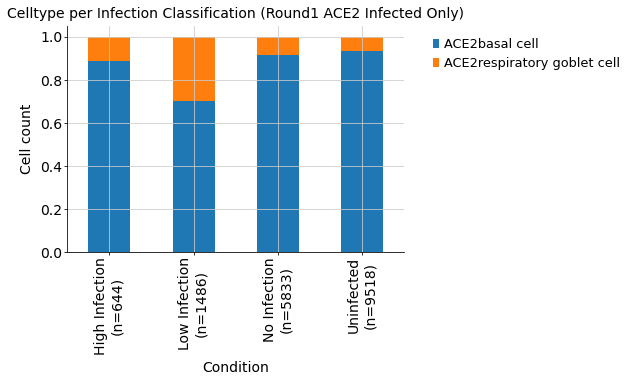

In [108]:

df = adata.obs[['infection_gmm_annotated', 'condition_manual_ct_annotation']].groupby(['infection_gmm_annotated', 'condition_manual_ct_annotation']).size().unstack(1)


df.index = [f'{a}\n(n={b})' for a,b in zip(df.index,np.sum(df, axis=1).values)]
df = df.divide(np.sum(df, axis=1), axis=0)

ax = df.plot.bar(stacked=True)
ax.set_xlabel('Condition')
ax.set_ylabel('Cell count')
ax.set_title('Celltype per Infection Classification (Round1 ACE2 Infected Only)')

ax.legend(bbox_to_anchor=(1.05, 1))

ax.get_figure().savefig('8_round1_figs/suppl1_round1_ct_per_infection_classification_ace2only.pdf', bbox_inches='tight', dpi=300)




# Celltype infection

In [112]:

adata = anndata.read('round1_processed.h5ad')
adata = adata[adata.obs['manual_ct_annotation'] != 'lung ciliated cell']
adata = adata[adata.obs['condition']=='ACE2']
adata.obs['condition_manual_ct_annotation'] = adata.obs['condition'].astype(str) + adata.obs['manual_ct_annotation'].astype(str)


Trying to set attribute `.obs` of view, copying.


In [113]:
adata

AnnData object with n_obs × n_vars = 17481 × 36611
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

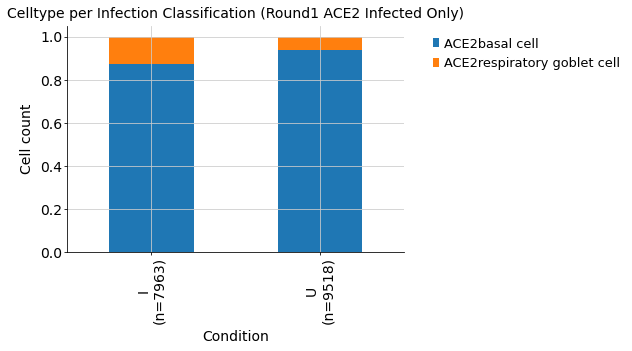

In [114]:

df = adata.obs[['infection', 'condition_manual_ct_annotation']].groupby(['infection', 'condition_manual_ct_annotation']).size().unstack(1)


df.index = [f'{a}\n(n={b})' for a,b in zip(df.index,np.sum(df, axis=1).values)]
df = df.divide(np.sum(df, axis=1), axis=0)

ax = df.plot.bar(stacked=True)
ax.set_xlabel('Condition')
ax.set_ylabel('Cell count')
ax.set_title('Celltype per Infection Classification (Round1 ACE2 Infected Only)')

ax.legend(bbox_to_anchor=(1.05, 1))

ax.get_figure().savefig('8_round1_figs/suppl1_round1_ct_per_infection_ace2only.pdf', bbox_inches='tight', dpi=300)


# Gene Signitures

In [115]:
import anndata
import scanpy as sc

## Interferons

In [116]:


adata = anndata.read('round1_processed.h5ad')



In [117]:

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [118]:
interferons = ["IFNL1", "IFNL2", "IFNL3", "IFNB1", "IFNG", "IFNA2", "IL6"]

In [119]:
interferons

['IFNL1', 'IFNL2', 'IFNL3', 'IFNB1', 'IFNG', 'IFNA2', 'IL6']

In [120]:
infection_categories_order = ['High Infection', 'Low Infection', 'No Infection', 'Uninfected']

In [121]:
[s for s in adata.var_names if 'IFN' in s]

['IFNLR1',
 'IFNGR1',
 'IFNB1',
 'IFNW1',
 'IFNA21',
 'IFNA4',
 'IFNA7',
 'IFNA10',
 'IFNA16',
 'IFNA17',
 'IFNA14',
 'IFNA5',
 'IFNA6',
 'IFNA13',
 'IFNA2',
 'IFNA8',
 'IFNA1',
 'IFNE',
 'IFNK',
 'IFNG-AS1',
 'IFNG',
 'IFNL3',
 'IFNL2',
 'IFNL1',
 'IFNAR2',
 'IFNAR1',
 'IFNGR2']

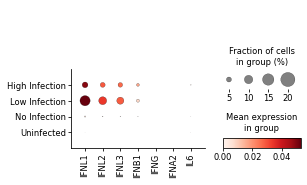

In [122]:
ax = sc.pl.dotplot(adata,
              interferons,
              groupby = 'infection_gmm_annotated', 
#               save = 'round1_camille_interferon_list.pdf',
              log = True, 
              categories_order = infection_categories_order,
                   return_fig=True
             )

ax.savefig('8_round1_figs/round1_camille_interferon_list.pdf', bbox_inches='tight')

In [123]:
adata

AnnData object with n_obs × n_vars = 27847 × 36611
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [124]:
ace2_infection_categories = ['ACE2_I','WT_I', 'ACE2_U',  'WT_U']

In [125]:
adata.obs['ace2_infection'] = adata.obs['condition'].astype(str) + '_' + adata.obs['infection'].astype(str)

... storing 'ace2_infection' as categorical


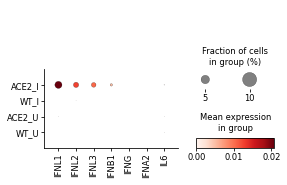

In [126]:
ax = sc.pl.dotplot(adata,
              interferons,
              groupby = 'ace2_infection', 
#               save = 'round1_interferons_ace2oe_infection.pdf',
              log = True, 
              categories_order = ace2_infection_categories,
                   return_fig=True
             )
ax.savefig('8_round1_figs/round1_interferons_ace2oe_infection.pdf', bbox_inches='tight')



## ISGs

In [127]:
import pandas as pd

In [128]:
isg_full = list(pd.read_csv('gene_sigs/full gene list.txt').columns)

In [129]:
isg_full += [v for v in adata.var_names if 'ISG' in v]
isg_full += [v for v in adata.var_names if 'IRF' in v]

In [130]:
isg_full = set(isg_full)

In [131]:
len(isg_full)

197

In [134]:

highinf_de_genes = pd.read_csv('7.1_go_analysis_results/round1_ace2only_high_infection_vs_uninfected.csv', header=None)




In [135]:
highinf_de_genes

,0,1
0,IER2,5.233672e-146
1,ISG15,7.285810e-136
2,IFI27,2.711136e-130
3,EGR1,8.758084e-129
4,NFKBIA,9.820751e-124
...,...,...
36583,CLCA2,4.477190e-114
36584,SRSF9,2.586196e-121
36585,SEC61G,5.448730e-145
36586,COMT,2.595963e-151


In [136]:
top_de = highinf_de_genes[0][:50]

In [137]:
filtered_isgs = list(set(isg_full).intersection(set(top_de)))

In [138]:
filtered_isgs = np.array(filtered_isgs)

In [139]:
# this is to reorder the ISGs based on avg expression (low -> high)
# filtered_isgs=filtered_isgs[list(np.array(np.argsort(np.sum(adata[:,filtered_isgs].X, axis=0))).reshape(-1))]

# next lines to reorder ISGs based on difference between I and U groups:

infected_isg_counts = np.sum(adata[adata.obs['infection']=='I',filtered_isgs].X.toarray(), axis=0)
uninfected_isg_counts = np.sum(adata[adata.obs['infection']=='U',filtered_isgs].X.toarray(), axis=0)

sum_counts = infected_isg_counts+uninfected_isg_counts

filtered_isgs = filtered_isgs[np.argsort((infected_isg_counts - uninfected_isg_counts)/sum_counts)[::-1]]

In [140]:
filtered_isgs

array(['IFI6', 'MX1', 'ISG15', 'OAS2', 'IFI27', 'IFI35', 'IRF7', 'OAS1',
       'IRF1', 'ISG20', 'STAT1', 'EIF2AK2', 'EGR1', 'PPP1R15A', 'NFKBIA',
       'DUSP1', 'IER2', 'KLF6', 'JUN', 'JUNB', 'ELF3', 'CCNL1', 'GADD45A',
       'IER3', 'HES1', 'SQSTM1', 'PLAU'], dtype='<U8')

In [141]:
# Dont' need to show genes after stat1:
filtered_isgs = filtered_isgs[:np.where(filtered_isgs=='STAT1')[0][0]+1]

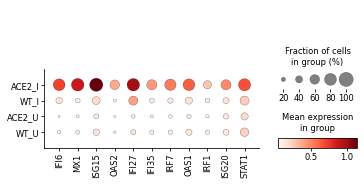

In [142]:
ax = sc.pl.dotplot(adata,
              filtered_isgs,
              groupby = 'ace2_infection', 
              log = True, 
              categories_order = ace2_infection_categories, 
                   return_fig=True
             )

ax.savefig('8_round1_figs/round1_isgs_ace2wt_infection.pdf', bbox_inches='tight')


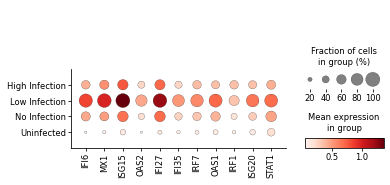

In [143]:
ax = sc.pl.dotplot(adata,
              filtered_isgs,
              groupby = 'infection_gmm_annotated', 
              log = True, 
              categories_order = infection_categories_order,
                   return_fig=True
             )

ax.savefig('8_round1_figs/round1_isgs_highlownoinfection.pdf', bbox_inches='tight')


In [144]:
adata.obs['infection_gmm_annotated_condition'] = adata.obs['infection_gmm_annotated'].astype(str) + '_' + adata.obs['condition'].astype(str)

... storing 'infection_gmm_annotated_condition' as categorical


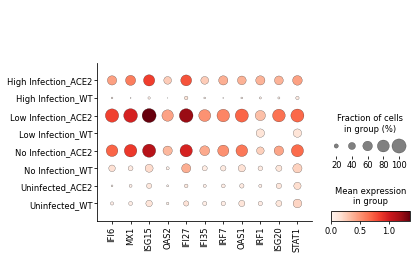

In [145]:
sc.pl.dotplot(adata,
              filtered_isgs,
              groupby = 'infection_gmm_annotated_condition', 
#               save = 'round1_camille_interferon_list.pdf',
              log = True, 
#               categories_order = infection_categories_order
             )


In [146]:
adata.X[:10].todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.4620143 ,
         0.4620143 ],
        [0.        , 0.        , 0.        , ..., 0.26606685, 0.797187  ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.83410925, 0.83410925,
         0.83410925],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 1.5880265 ,
         1.0808015 ],
        [0.        , 0.        , 0.        , ..., 0.        , 2.0412421 ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.4858927 , 4.263666  ,
         4.3151364 ]], dtype=float32)

In [147]:
adata.obs['ace2_infection']

AAACCCAGTCCGCAGT-1    ACE2_I
AAACCCATCAGGTAAA-1    ACE2_I
AAACCCATCCTGTTAT-1    ACE2_I
AAACCCATCTAGTTCT-1    ACE2_I
AAACGAACATTCCTCG-1    ACE2_I
                       ...  
TTTGTTGGTTTGAAAG-1      WT_I
TTTGTTGTCATAGGCT-1      WT_I
TTTGTTGTCGTACCTC-1      WT_I
TTTGTTGTCGTAGTCA-1      WT_I
TTTGTTGTCTGTACAG-1      WT_I
Name: ace2_infection, Length: 27847, dtype: category
Categories (4, object): ['ACE2_I', 'ACE2_U', 'WT_I', 'WT_U']

In [148]:
sc.set_figure_params(scanpy=True, 
                     dpi=300,
                     dpi_save=300,
                     frameon=True,
                     vector_friendly=True,
                     fontsize=14,
                     figsize=None,
                     color_map=None,
                     format='png',
                     facecolor=None,
                     transparent=False,
                     ipython_format='png2x')


In [149]:
import matplotlib.pyplot as plt

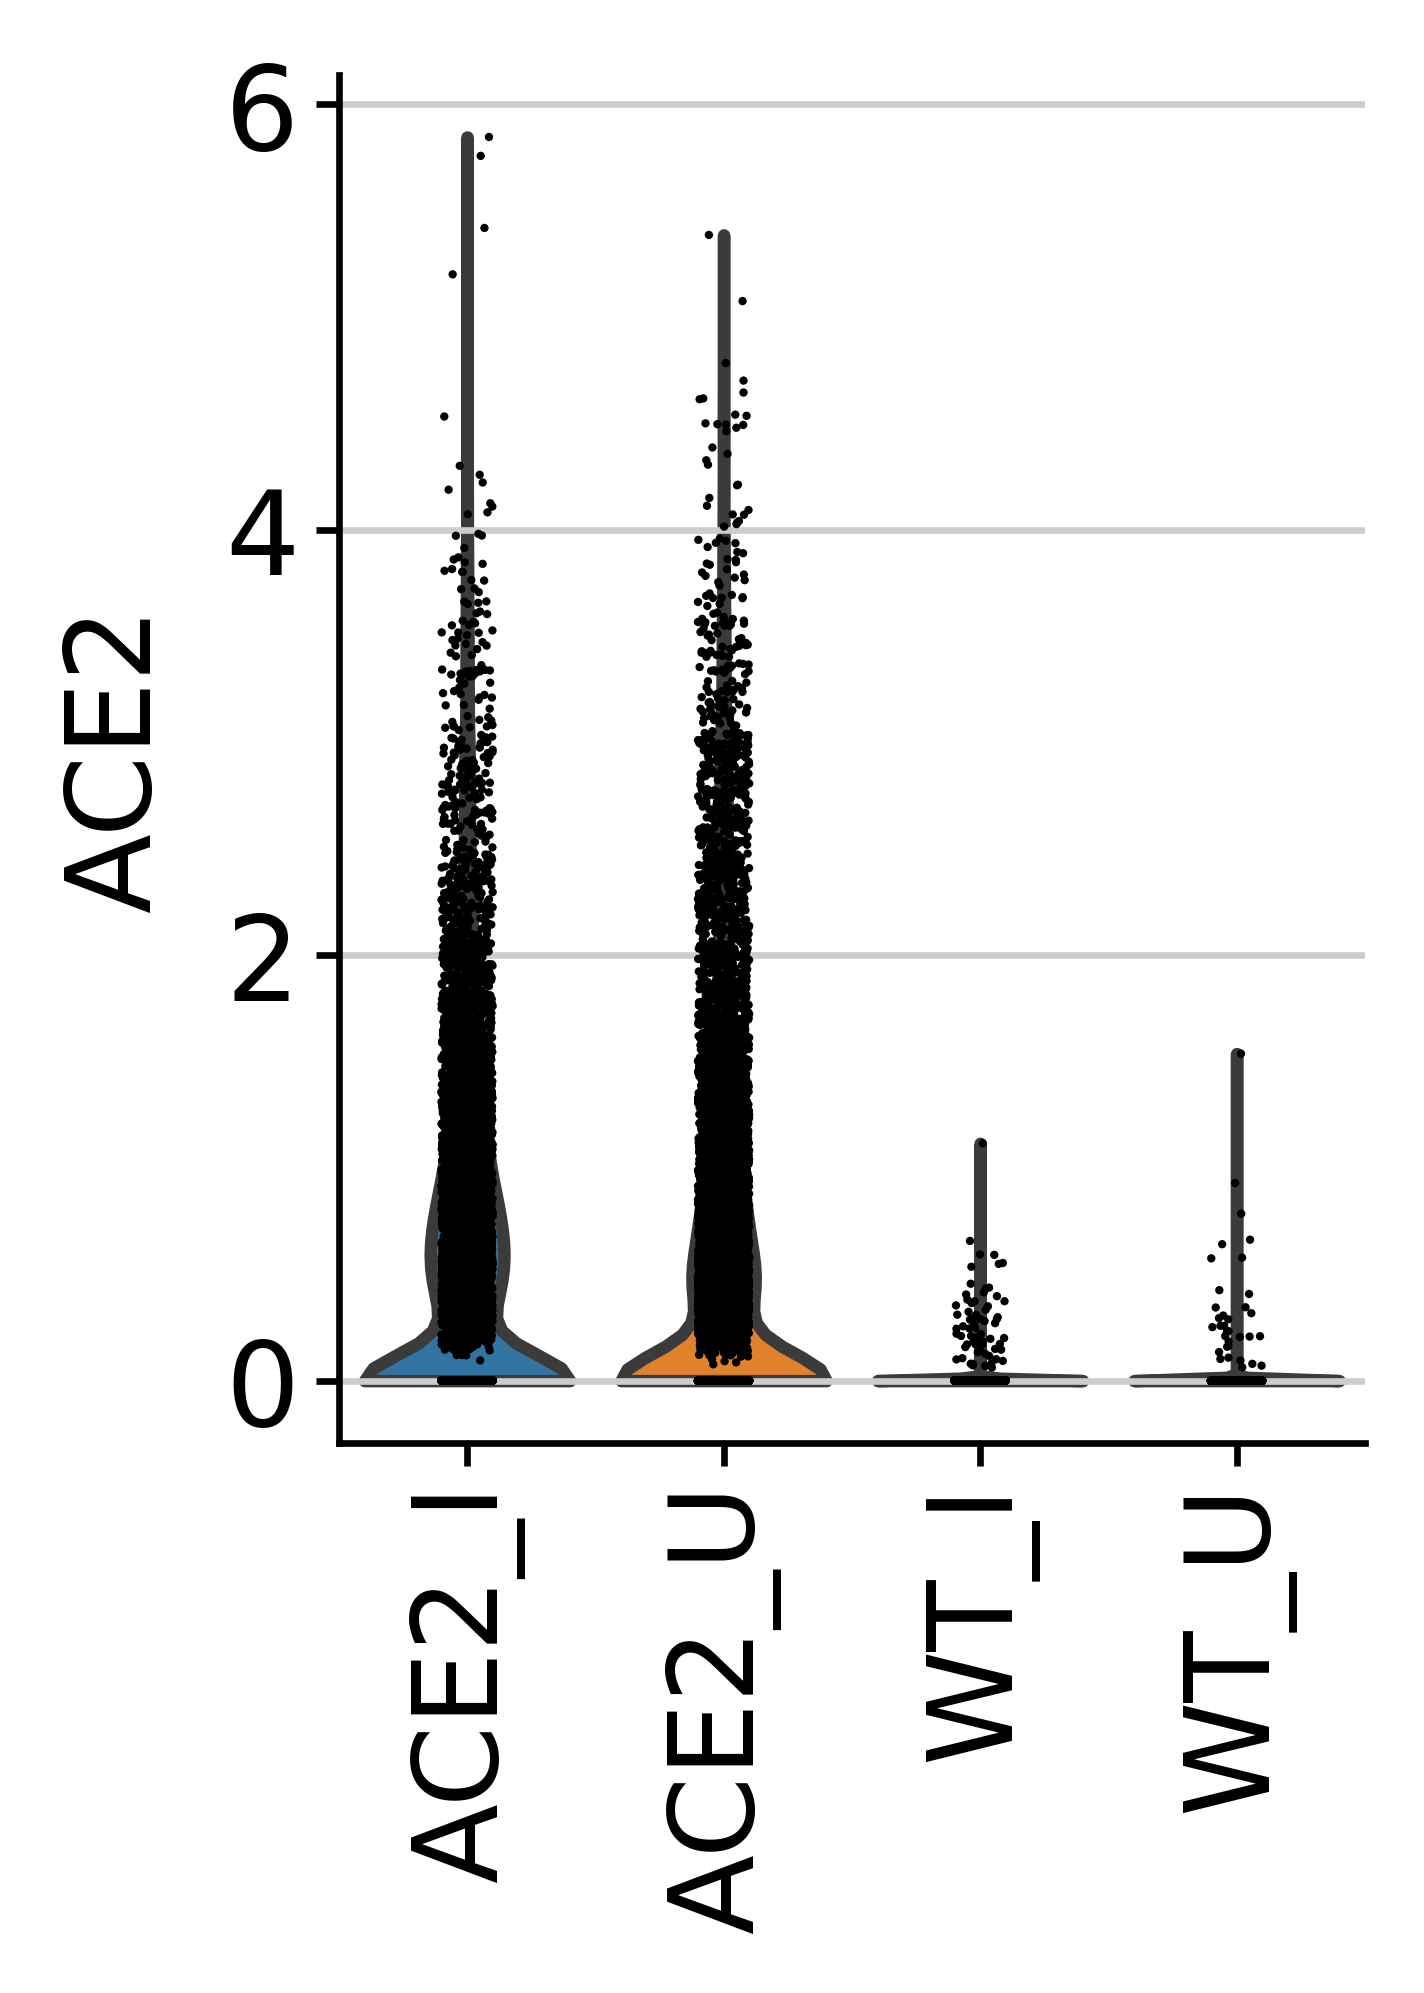

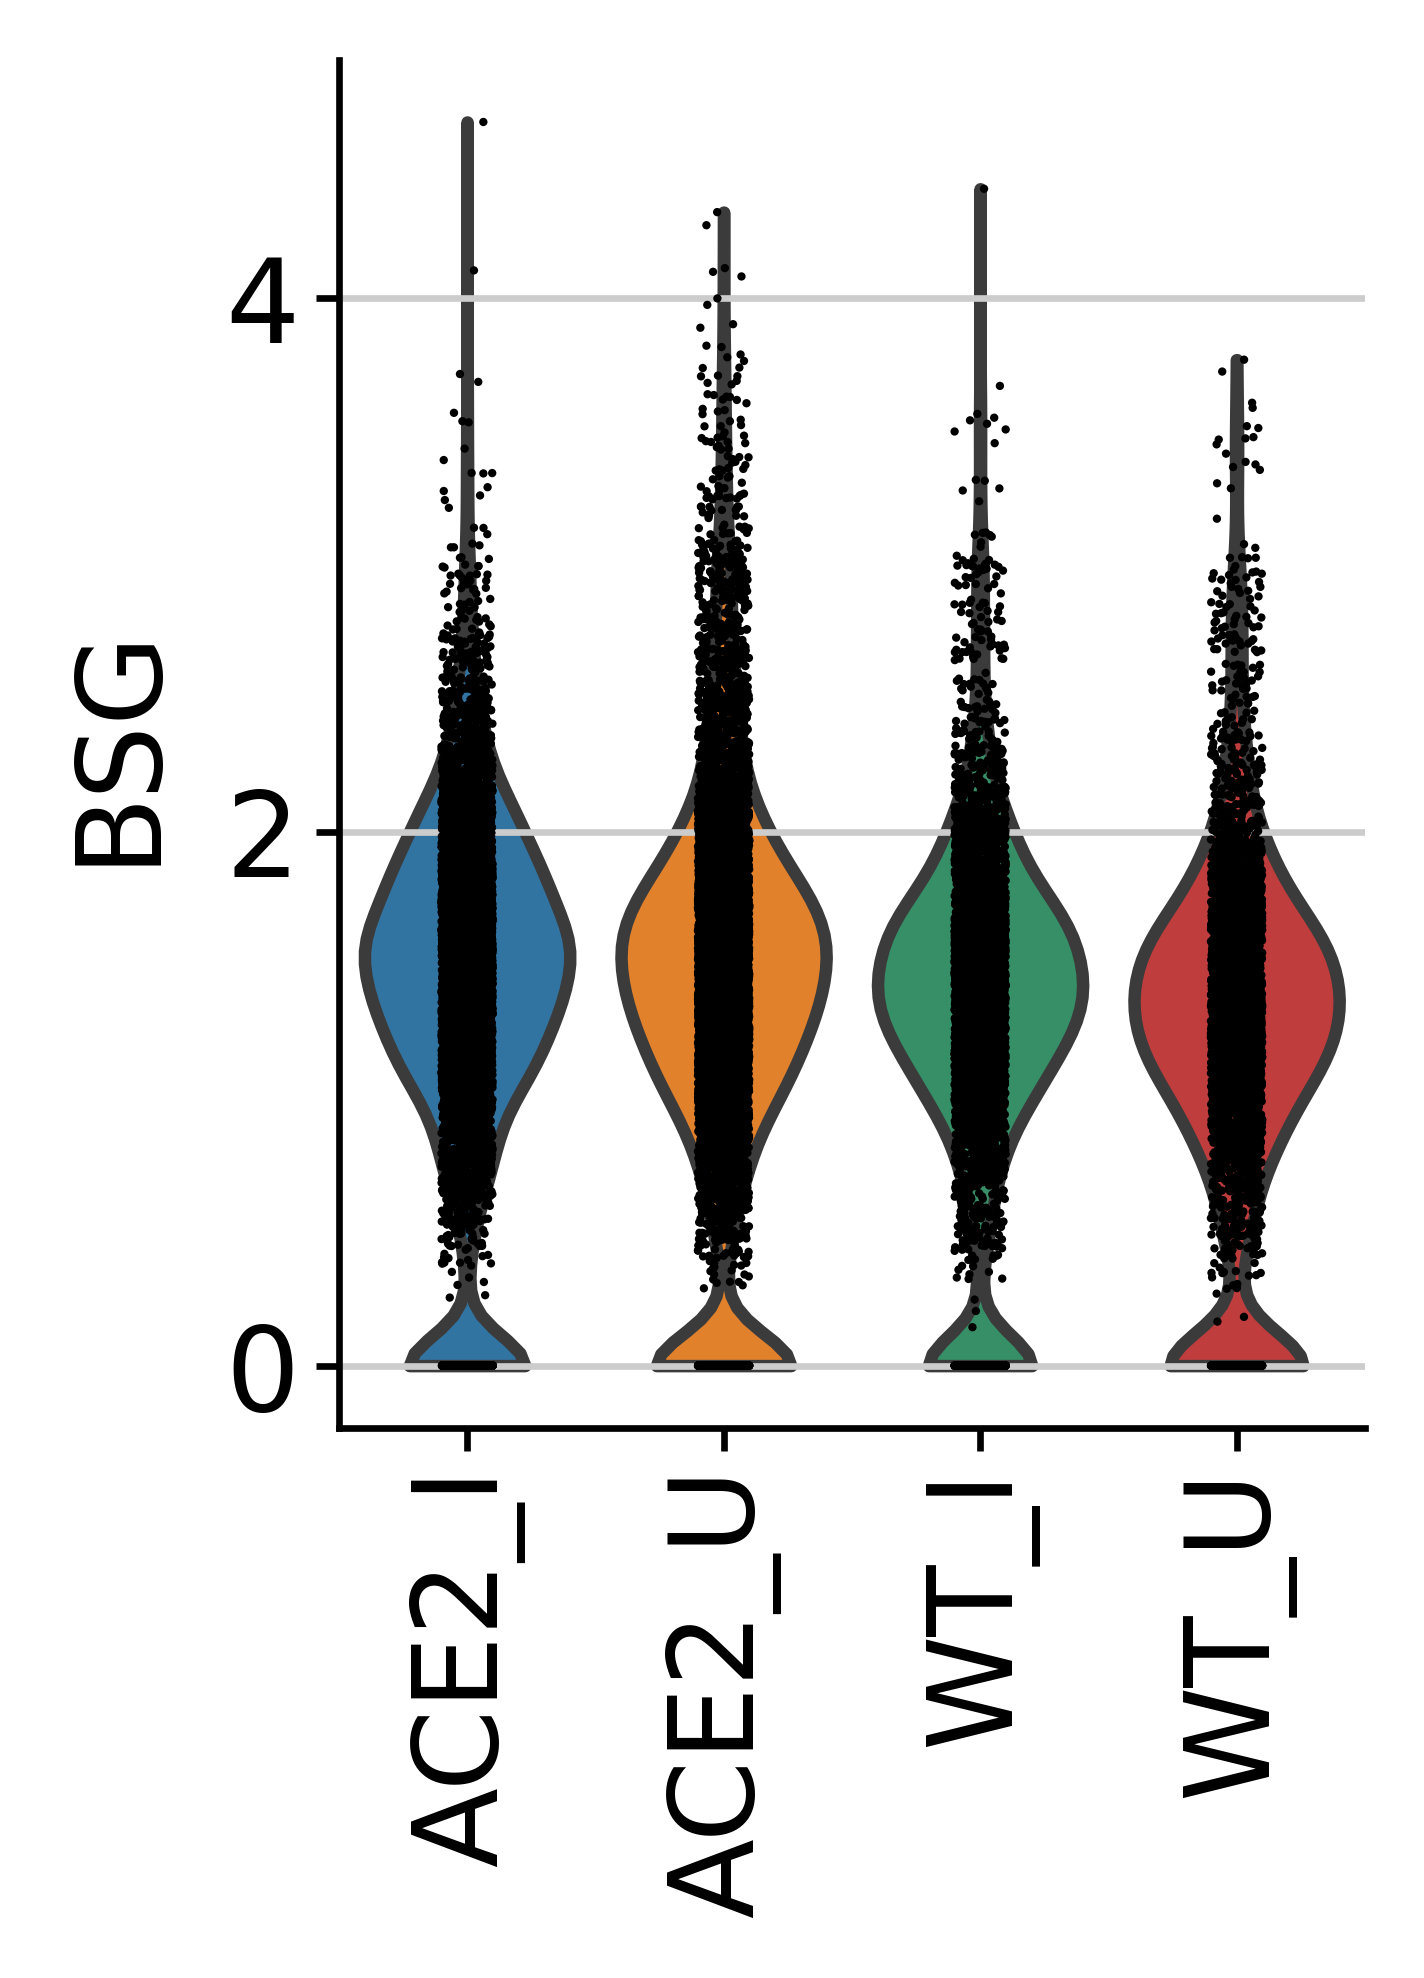

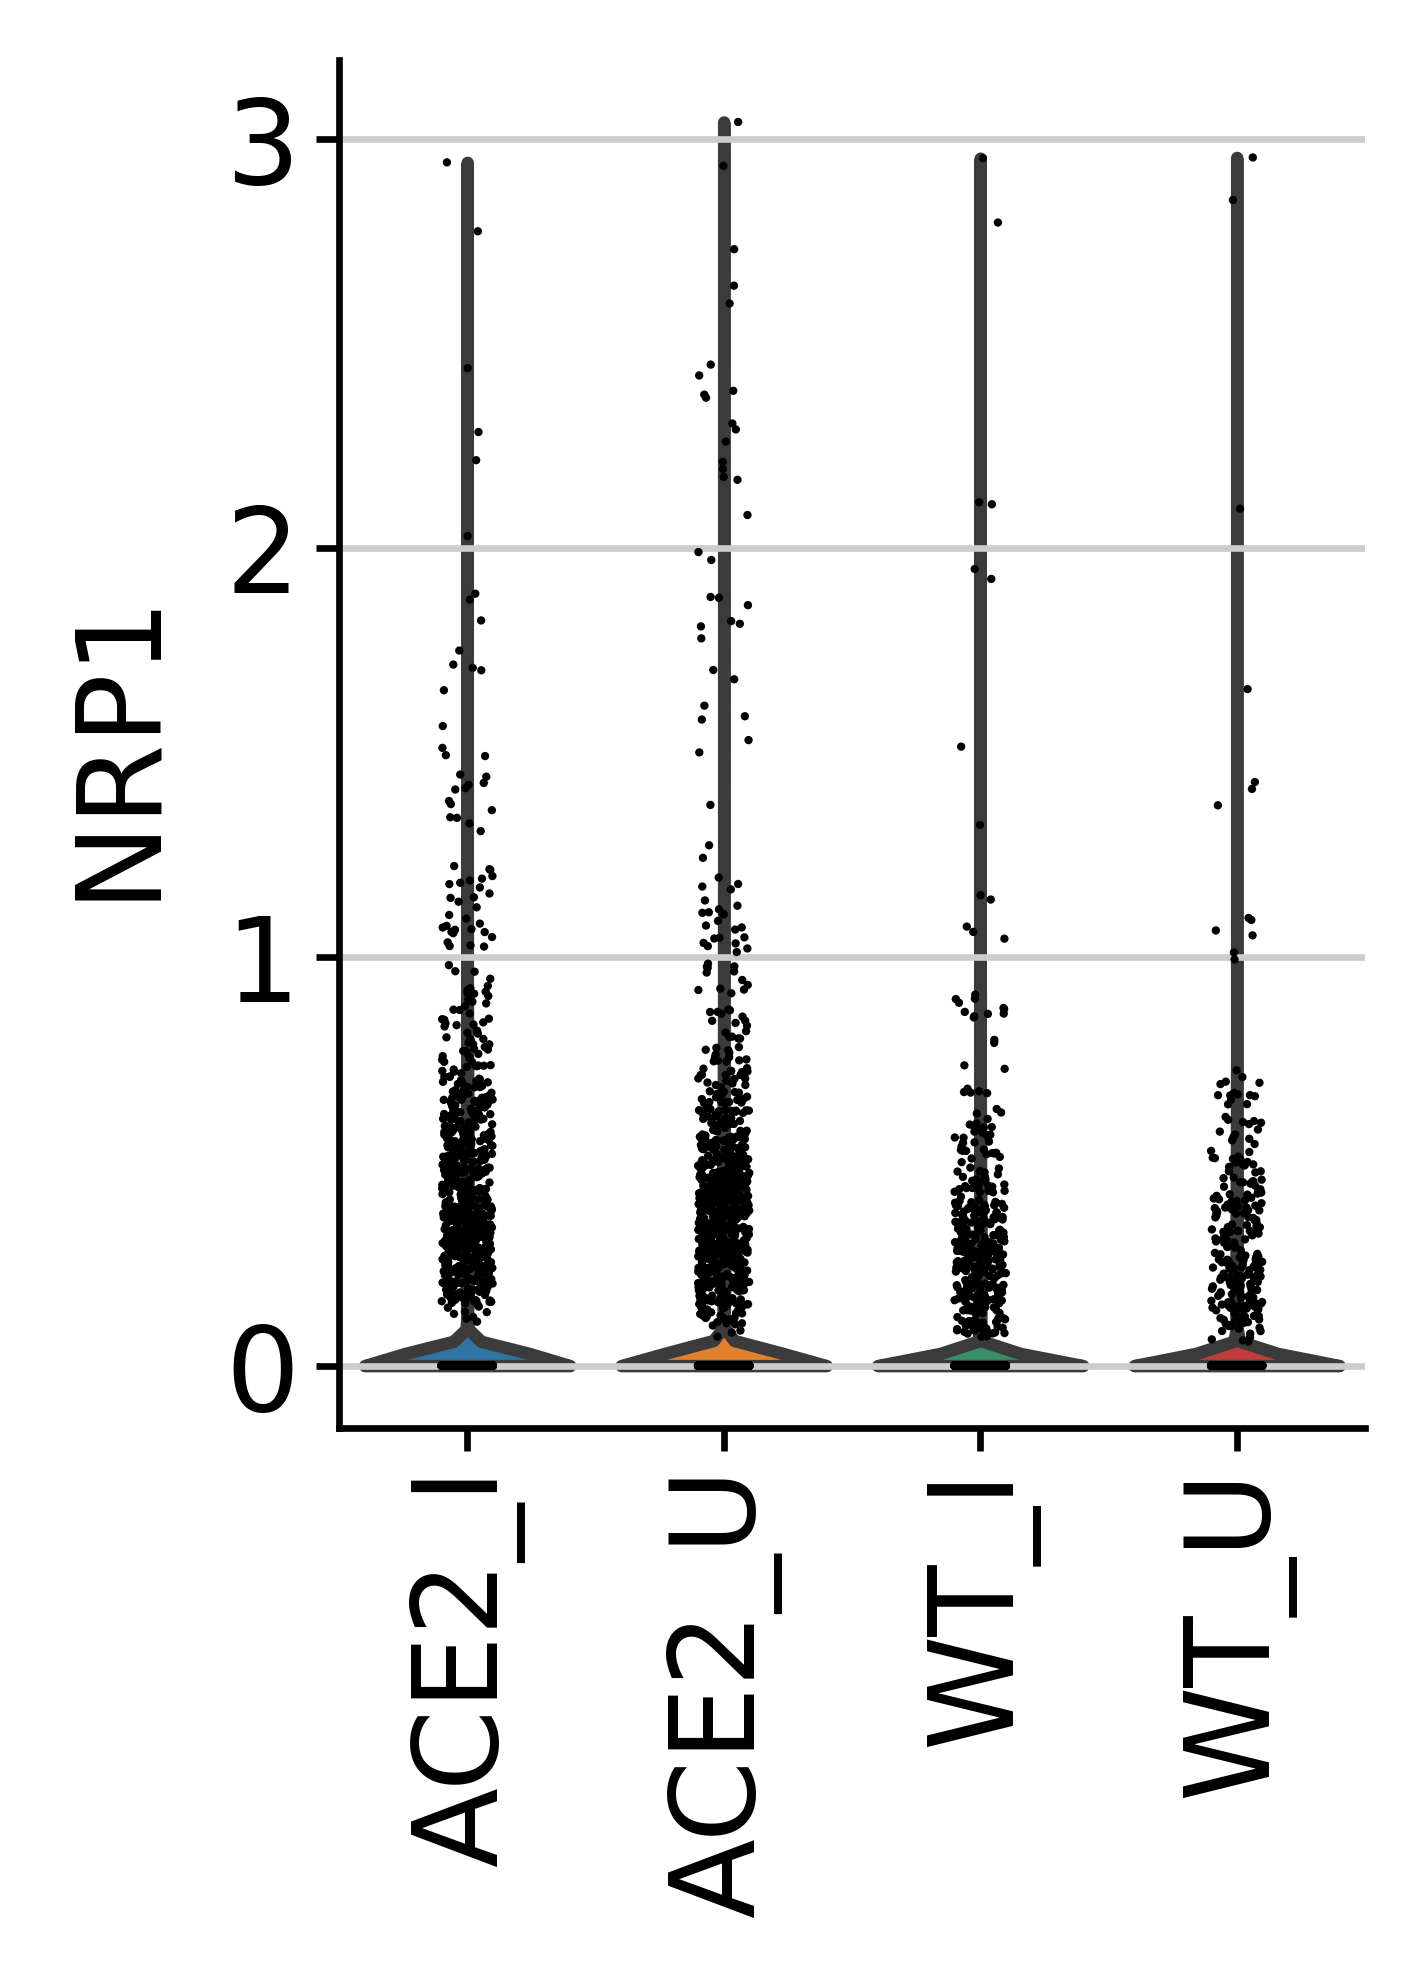

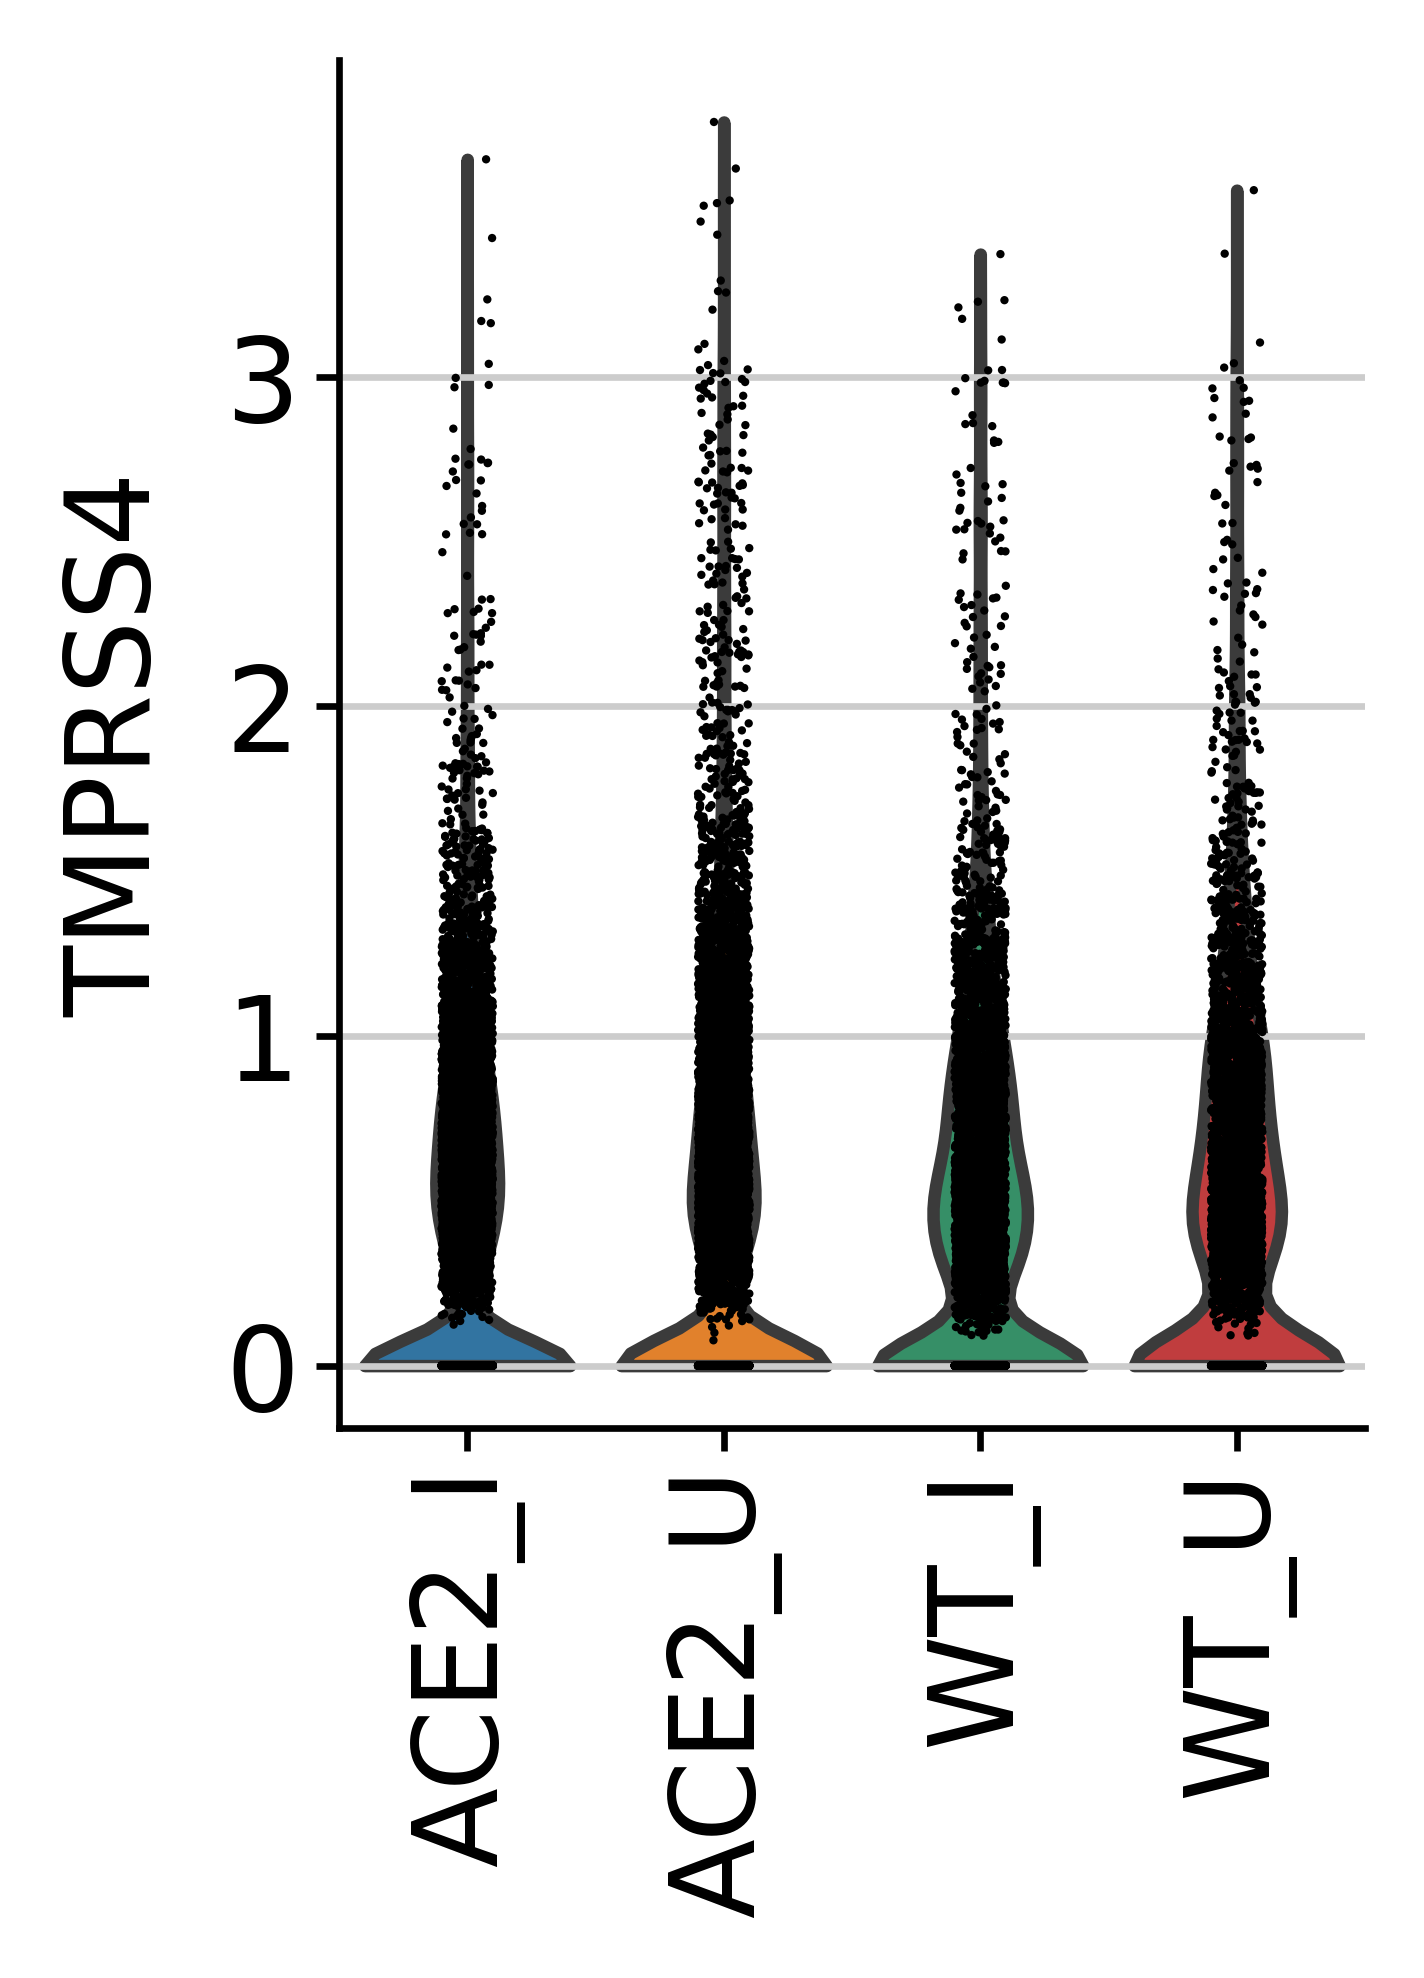

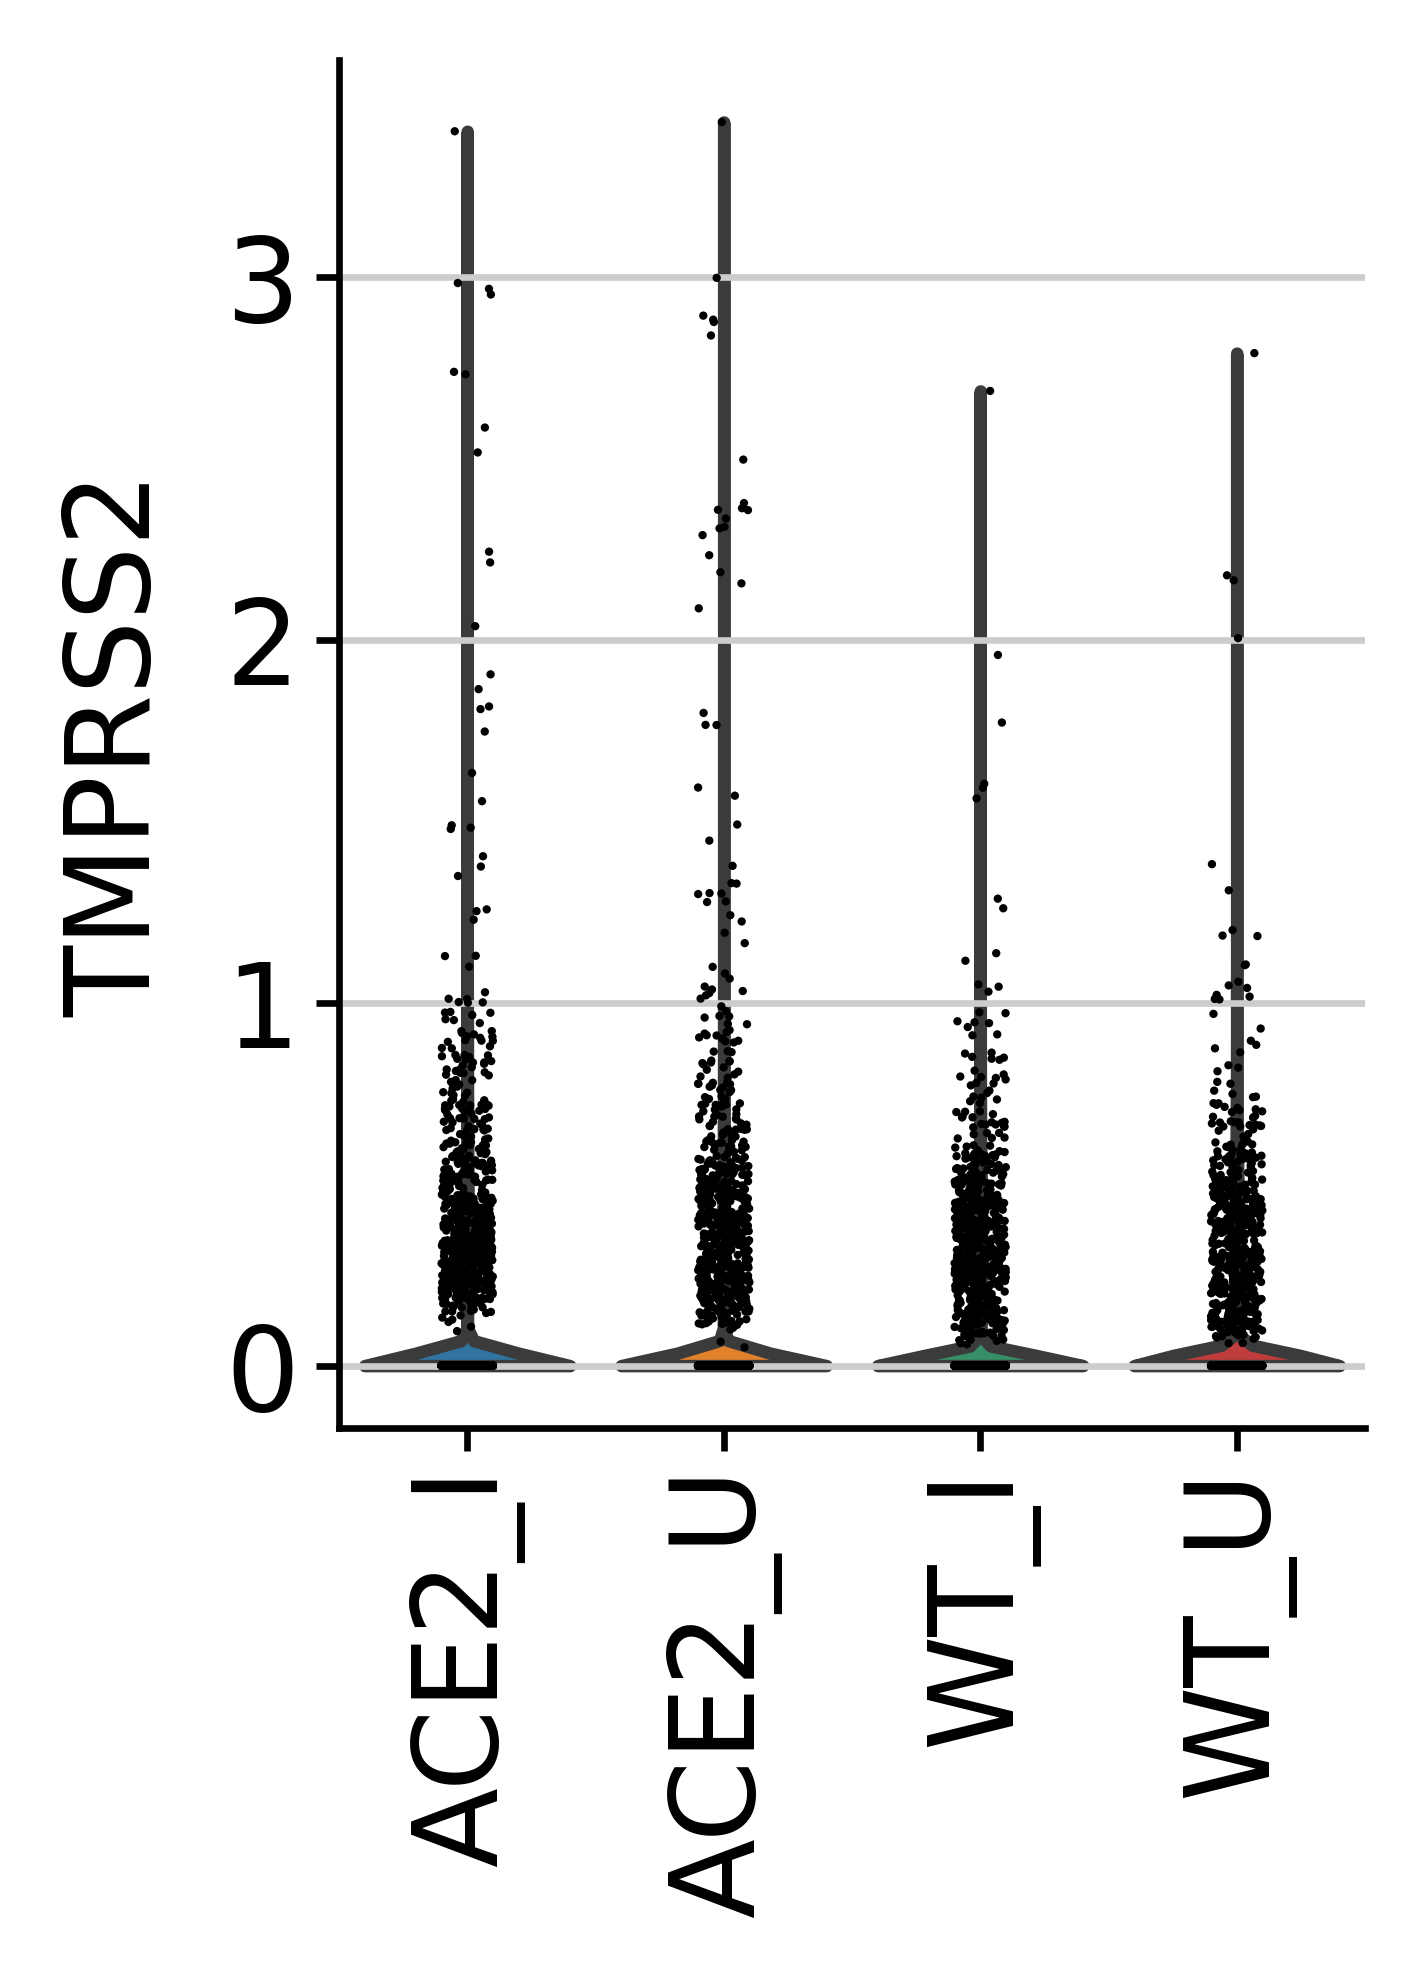

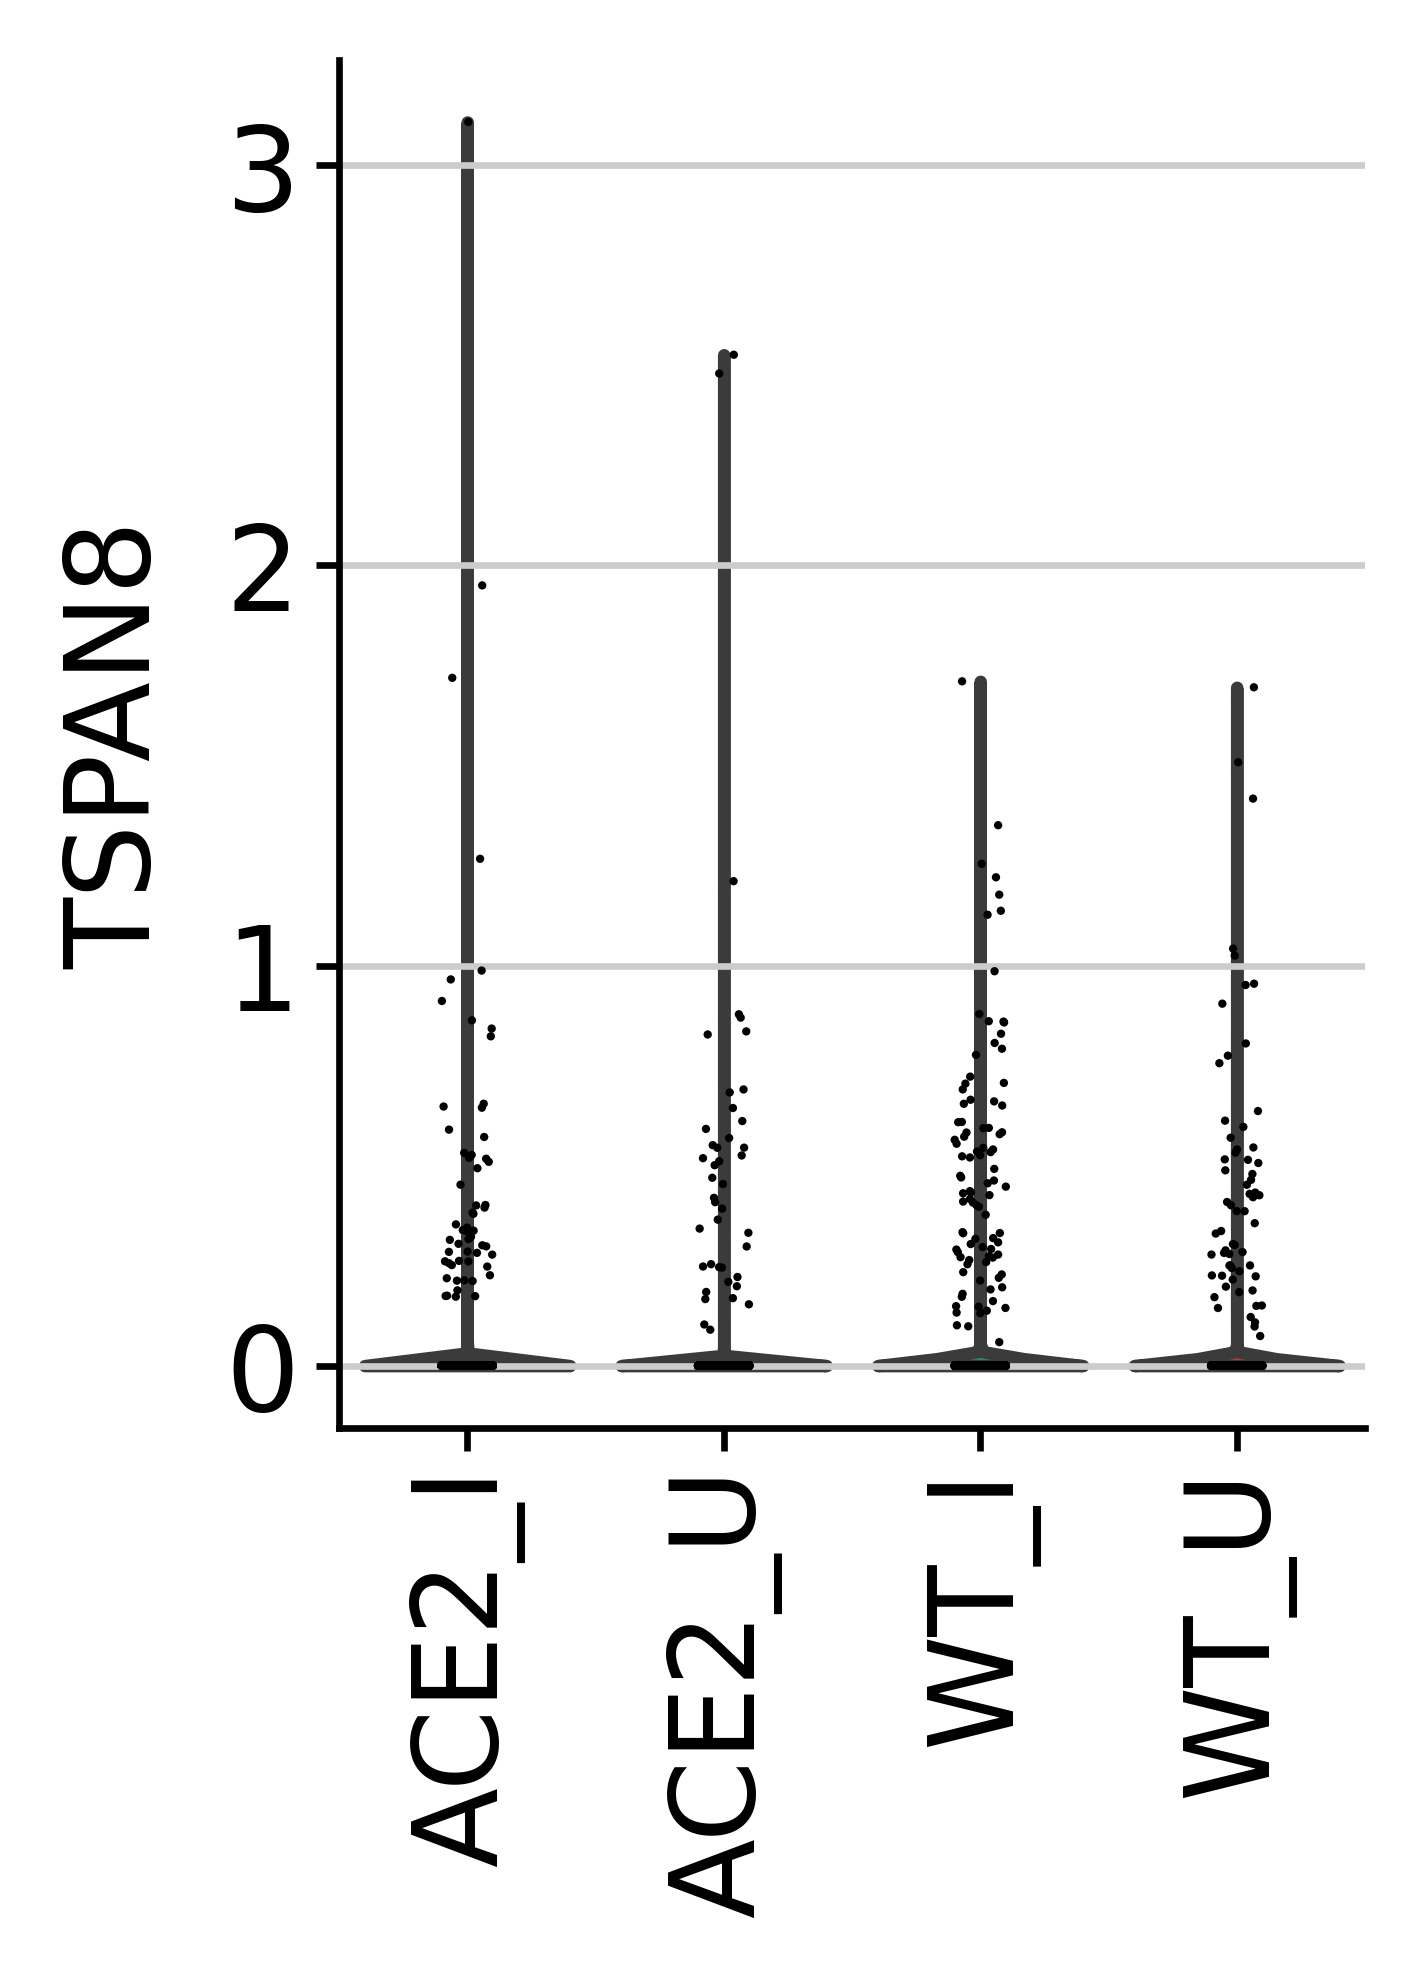

In [150]:
# with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": (300)}):


with plt.rc_context({"figure.figsize": (3, 3),
                     "figure.dpi": (300), 
                     'path.simplify':True}):
    
    sc.pl.violin(adata, keys="ACE2", groupby='ace2_infection', rotation=90, 
                 save = 'round1_ACE2_per_ace2_infection.pdf')

    sc.pl.violin(adata, keys="BSG", groupby='ace2_infection', rotation=90, 
                 save = 'round1_BSG_per_ace2_infection.pdf')
    
    sc.pl.violin(adata, keys="NRP1", groupby='ace2_infection', rotation=90,
                 save = 'round1_NRP1_per_ace2_infection.pdf')
    
    sc.pl.violin(adata, keys="TMPRSS4", groupby='ace2_infection', rotation=90,
                 save = 'round1_TMPRSS4_per_ace2_infection.pdf')

    sc.pl.violin(adata, keys="TMPRSS2", groupby='ace2_infection', rotation=90,
                 save = 'round1_TMPRSS2_per_ace2_infection.pdf')

    sc.pl.violin(adata, keys="TSPAN8", groupby='ace2_infection', rotation=90,
                 save = 'round1_TSPAN8_per_ace2_infection.pdf')
                 
